# Powtórka
wyprowadziliśmy metodę uczenia wielowarstwowych sieci nieliniowych bazującą na minimalizacji funkcji kosztu metodą gradientową. W dzisiejszym wykładzie zastanowimy się jak robić to w sposób:
* szybszy
* zmniejszający ryzyko wpadania w minima lokalne
* prowadzący do lepszej generalizacji

# Twierdzenie o potencjalnych możliwościach sieci
Sieć nieliniowa co najmniej dwuwarstwowa może aproksymować dowolną funkcję swoich wejść, ze z góry zadaną dokładnością. Konieczna jest jedynie dostatecznie duża ilość jednostek w warstwach ukrytych. Do aproksymacji dowolnej funkcji ciągłej wystarcza jedna warstwa ukryta. 

Uzasadnienie nieformalne:
>  Każda “rozsądna” funkcja $ F_i{X_k}$ może być przedstawiona jako liniowa kombinacja “wypukłości”, z których każda jest różna od zera tylko w pobliżu $X_k$.
> Takie “wypukłości” można skonstruować z dwóch warstw ukrytych. 

Gdzie jest problem?
* twierdzenie mówi jedynie o istnieniu rozwiązania 
* w ogólności nie wiadomo ile jednostek w warstwach stanowi “dostatecznie dużą ilość”
* nie ma gwarancji, że problem da się rozwiązać metodą wstecznej propagacji błędu, tzn. że dotrzemy do minimum globalnego funkcji kosztu.

> Trywialne twierdzenie: uczenie sieci zawsze się uda jeśli zastosujemy prawidłowy preprocesor.

Jeśli w problemie występują symetrie, to o ile to możliwe warto przenieść ich analizę do fazy preprocesingu, bo powodują one powstanie w funkcji kosztu okresowości, wielokrotnych minimów lokalnych, płaskich dolin i wyżyn.

Ze standardowych technik przygotowywania danych (nie tylko dla sieci nuropodobnych) warto rozważyć: 
* wyskalowanie danych, 
* normalizację danych, 
* przeprowadzenie analizy składowych głównych.

# Generalizacja
## O co tu chodzi? 
![Schemat ilustrujący koncepcję generalizacji](https://brain.fuw.edu.pl/edu/images/f/f7/Generalizacja.png)

Na rysunku obok przedstawiona jest schematycznie koncepcja generalizacji. 

Wyobraźmy sobie, że jest pewna przestrzeń P, która zawiera pary, np. liczb {((a,b), c)}. 

W tym przykładzie jest to przestrzeń wszystkich odwzorowań $\mathcal{R}^2 \rightarrow \mathcal{R}$. 

Niektóre z tych par reprezentują pewną konkretną relację R: np. są to pary spełniające warunek $c=\sqrt{a^2 +b^2}$.

Wyobraźmy sobie dalej, że mamy dane dwa skończone zestawy par, które tą relację spełniają, ale oczywiście nie są w stanie obejmować wszystkich możliwych par. 

Jeden z nich oznaczymy U, a drugi T. Załóżmy, że mamy dwie wersje sieci, które uczymy na zbiorze U (mogą się one różnić architekturą, albo punktem startu procedury uczącej, albo ilością iteracji algorytmu uczącego itp.). 

Po procesie uczenia sieci te mają mały i porównywalny błąd na zbiorze U, ale jedna z nich nauczyła się relacji wskazanej na rys. jako g1 a druga relacji g2. 

Na podstawie rezultatów odtwarzania przykładów ze zbioru testowego mówimy, że sieć druga ma lepszą generalizację niż sieć pierwsza.

## Jakie mogą być przyczyny złej generalizacji?

* Architektura nie wystarczająca do reprezentacji relacji

* Architektura zbyt złożona ... 
... do danego odwzorowania i zbyt długi proces uczenia:

* Dotyczy to sytuacji, gdy zbiór uczący zawiera przykłady danej relacji z szumem. Sieć ma tak dużo parametrów, że jest w stanie nauczyć się szczegółów zbioru uczącego nie związanych z interesującą nas relacją. Zjawisko takie nazywamy ''przeuczeniem''.

# Przeuczanie

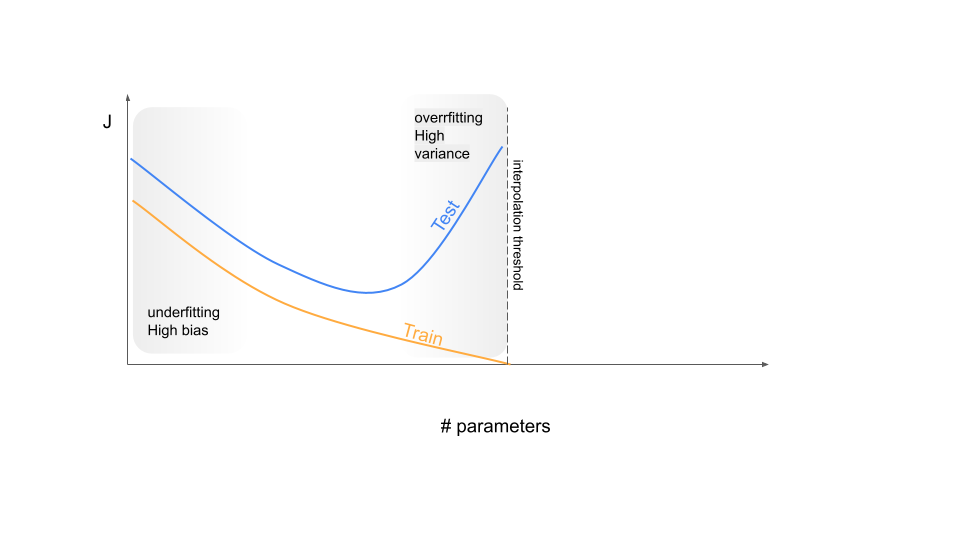

## Uczenie z kryterium wczesnego stopu 
*  Oprócz zbioru uczącego posiadamy rozłączny z nim zbiór testowy.
* W trakcie uczenia obliczamy błąd popełniany przez sieć na zbiorze uczącym i na zbiorze testowym. 
* W większości przypadków powinniśmy w początkowej fazie uczenia obserwować malenie błędu na obu zbiorach. 
* Oczekujemy, że w pewnym momencie, kiedy sieć zaczyna się uczyć zbędnych szczegółów to błąd na zbiorze uczącym będzie nadal malał, a na zbiorze testowym zacznie rosnąć. 
* Uczenie prowadzimy tylko do momentu, kiedy błąd na obu zbiorach maleje. 

![](https://brain.fuw.edu.pl/edu/images/7/76/Wczesny_stop.png)


## Optymalizacja architektury: Regularyzacja
> Pomysł: zacznijmy od dużej sieci i po pewnym cyklu uczenia przeanalizujmy połączenia w sieci usuwając mało istotne połączenia lub jednostki. Następnie powtórzmy uczenie.

Można spróbować tak zmodyfikować regułę zmiany wag, aby połączenia nieistotne same dążyły do 0; po standardowym kroku uczenia zmniejszamy wagi: 

$\qquad$ $ w_q^{p(j+1)} = (1- \epsilon) w_q^{p(j)} $   (*)

Jest to równoważne modyfikacji funkcji kosztu:

$\qquad$ $J = J_0 + \frac{1}{2} \gamma \sum_{pq}\left(w_q^p \right)^2$

przy $\epsilon  = \alpha \gamma$.

Konsekwencje:
* rozwiązanie jest “gładsze”
* wygładzenie funkcji kosztu likwiduje część minimów lokalnych

Powyższa funkcja kosztu prowadzi do preferowania większej liczby małych wag zamiast jednej dużej. Sytuację poprawia wyrażenie:

$\qquad$ $ J = J_0 +\frac{1}{2}\gamma \sum_{pq} \frac{\left(w_q^p\right)^2}{1+\left(w_q^p \right)^2}$

co jest równoważne (*) przy 

$\qquad$ $\epsilon_q^p = \frac{\alpha \gamma}{\left( 1+ \left(w_q^p \right)^2\right)^2}$. 

Dzięki temu małe wagi zanikają szybciej niż duże. To załatwia problem zanikania niepotrzebnych połączeń. 

Aby zautomatyzować usuwanie zbędnych jednostek możemy zastosować:

$\qquad$ $ \epsilon^p = \frac{\alpha \gamma}{ \left( 1+\sum_q \left( w_q^p \right)^2\right)^2}$
dla wszystkich wejść do jednostki $p$. 

Powoduje to szybsze zanikanie wag dla jednostek, które mają małe wagi wejściowe.

# Demo w tensorflow playground 

[https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.23806&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false]

# Metody specyficzne dla sieci 
* uśrednianie różnych wersji modeli *ensembling*
  * trenowanych na różnych podzbiorach danych treningowch
  * dla rónych inicjalizacji parametrów
  * dla różnych architektur
  
Te różne pomysły można upakować w jeden model w technice zwanej **dropout** [(Geoffrey Hinton, et al.2012)](https://arxiv.org/abs/1207.0580).
-> przejrzyjmy tą pracę (Fig. 1, 2, 6, 7)

* W czasie treningu niektóre, losowo wybrane wyjścia z danej warstwy są ignorowane - *wypadają*
  * efektywnie wygląda to tak jakby w tym cyklu uczenia ta warstwa miała inną liczbę jednostek i polączeń,
  
  Jednym z efektów, które sugeruje się, że dropout zapobiega to tzw., złożone ko-adaptacje, czyli proces w którym kolejne jednostki korygują błędy popełnione przez inne jednostki. Losowy dropout niszczy takie ko-adaptacje.
  
 Dropout symuluje rzadką aktywację z danej warstwy, co promuje wytwarznie przez sieć rzadkiej reprezentacji wejścia.
 
 

## Jak prowadzić dropout
* dropout implementowany jest na zasadzie per-warstwa

* może być stosowany po warstwach w pełni połączonych, konwolucyjnych i rekurencyjnych
* może wystąpić po dowolnej z wewnętrznych warstw sieci, także zaraz po warstwie wejściowej, nie stosuje się go tylko dla warstwy wyjściowej
* hiperparametr określa prawdopodobieństwo wypadnięcia wyjścia - warto sprawdzić w dokumentacji danej biblioteki czy określa on prawdopodobieństwo wypadnięcia, czy pozostawienia wyjścia
  * dla pytorch jest to porawdopodobieństwo wypadnięcia
  ---
  > https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
  >During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution. Each channel will be zeroed out independently on every forward call.
  
  > This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons as described in the paper Improving neural networks by preventing co-adaptation of feature detectors .

  >Furthermore, the outputs are scaled by a factor of  $\frac{1}{1-p}$  during training. This means that during evaluation the module simply computes an identity function. 
  ---
  
* dropout jest wyłączny w trakcie robienia predykcji, i wagi są odpowiednio skalowane 
* zwykle warsty bliżej wejścia mają mniejszy dropout (prawdopodobieństwo wypadnięcia jednostki ~ 0.2 a jednotki ukryte ~0.5)

Przejrzyjmy pracę źródłową z przykładmi (uwaga- w tej pracy p oznacza prawdopodobieństwo pozostawienia jednostki w sieci):
[Srivastava(2014), Dropout: A Simple Way to Prevent Neural Networks from Overfitting](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
(Fig. koncepcja 1, przykład zachowania błędu testowego 4, rzadkość reprezentacji: 7, 8, zależność błędu od p 9)

# Batch normalization
Tekst źródłowy [Ioffe, 2015, Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

* duże sieci neuronowe najczęściej uczy się mini-paczkami (min-batch) danych, tzn. wagi aktualizuje się po przepuszczeniu paczki danych przez sieć do przodu - daje to lepszą estymatę gradientu funkcji kosztu.
* wejścia do każdej z warstw zależą od parametrów wszystkich poprzedzających warstw i problem narasta wraz z głębokością sieci.

* Motywacją do zaproponowania Batch normalization jest efekt "internal covariate shift" - polega on na tym, że po uaktualnieniu wag po mini-batchu rozkłady wejść do warstw głębokich ulegają zmianom. Może to skutkować tym, że algorytm będzie ciągle musiał uczyć się korekt tych zmian rozkładów.
* aby temu zapobiec zaproponowano technikę standaryzowania wejść znaną jako **batchnorm**.
  * działa ona na każdym wymiarze wejścia do warstwy niezależnie
  * polega na odjęciu średniej i podzieleniu przez std  gdzie średnia i std są obliczane dla danego wymiaru wekotra cech po przykładach z mini-batcha (Algorytm 1 w źródłowym tekście). Dodatkowo w procesie uczenia znajdowane są wartości $\gamma$ i $\beta$ pozwalające na ponowne przeskalowanie i przesunięcie wyjścia z operacji BN. W czasie treningu sieci uczeniu podlegają parametry sieci oraz  $\gamma$ i $\beta$. 
  * W czasie predykcji do skalowania wejść używane są wartości oczekiwane średniej i std liczone po mini-batcha'ch. (Algorytm 2 w źródłowej pracy).
  
* stosowanie batch norm pozwala na znacznie szybsze uczenie i lepszą generalizację, ale:
  * powody skuteczności batch norm nie są jescze do konca zrozumiane
      * wydaje się, że redukcja "internal covariate shift" nie jest jedynym powodem sukcesów tej techniki
      * inne proponowane przyczyny to [wygładzanie krajobrazu funkcji kosztu](https://arxiv.org/pdf/1805.11604.pdf) (Fig. 4)),

# Podsumowując:

* dropout - dla każdego przyładu, który przepuszczmy przez sieć w losowy sposób 'wyłączamy' pewne neurony - dane przy przejściu w przód i w tył nie przechodzą przez nie i nie ruszane są ich wagi. Dla kolejnego przykładu zestaw wyłączonych neuronów jest inny.(oryg. art.: https://arxiv.org/pdf/1207.0580.pdf )  (https://www.youtube.com/watch?v=D8PJAL-MZv8 )
  * zabieg ten ma wpływ regularyzacyjny na sieć
  * intuicyjne wyjaśnienie: 
    * jednostka nie może w pełni polegać na tym, że zawsze ma dostęp do danych dostarczanych z wejścia i-tego więc nie powinna nadmiernirnie zwiększać wagi dla tego połączenia (trochę jak regularyzacja z normą $L2$). -> zabieg ten zmniejsza prawdopodobieństwo przeuczenia sieci.
    * z drugiej strony można na to patrzeć, że "uczymy wiele wersji" sieci jednocześnie, a potem uśredniamy po tych wersjach
  * prawdopodobieństwo usumięcia neuronu może być różne dla różnych warstw
  
* mini batch gradient descent - technika przydatna przy bardzo dużych zbiorach danych; 
  * dzielimy zbiór uczący na podzbiory ("batch"), 
  * obliczamy skumulowany gradient dla danego batcha 
  * zmieniamy wagi, 
  * bierzemy kolejny batch 

* batch normalization (oryginalny art. z tym pomysłem: https://arxiv.org/pdf/1502.03167v3.pdf )( https://www.youtube.com/watch?v=tNIpEZLv_eg )
  * normalizacja (odjęcie średniej i podzielenie przez st. odchylenie) wejść dla pojedynczego neuronu "poprawia" kształt funkcji kosztu czyniąc ją bardziej symetryczną
  * ta intuicja jest przeoszona do normalizacji każdej warstwy w sieci głębokiej - wyjścia takiej warstwy są normalizowane (średnia i standardowe odchylanie są obliczane w obrębie mini-batcha). Warto zadbać o to aby głębokim warstwom umożliwić niekoniecznie pracę ze średnia 0 i wariancją 1 - stąd dodaje się trenowalne parametry modyfikujące średnią i wariancję. Zobaczmy to w źródłowym art. https://arxiv.org/pdf/1502.03167v3.pdf sekcja 3.
  
  

* Batchnorm i dropout raczej nie powinny być używane w tej samej sieci - statystyki używane do normalizacji aktywacji mogą stać się zaszumione przez losowe usunięcie jednostek w procedurze dropoutu.

## Diagnostyka i debugowanie algorytmu uczącego

Załóżmy, że zaimplementowaliśmy algorytm uczący na określonym (niewielkim) zbiorze danych. Mamy 20 % błędnych decyzji. Co z tym robić dalej?

Potencjalnie można:
* poprawić algorytm
* zdobyć więcej przykładów do ciągu uczącego
* wypróbować więcej cech lub ograniczyć przestrzeń cech
* pouczyć dłużej albo zmienić algorytm optymalizacyjny
* zmienić parametry uczenia (współczynnik szybkości, regularyzacji, itp.)
Każda z tych metod naprawia jakiś (ale inny) problem.

Aby zdiagnozować problem dobrze jest analizować wykresy błędu od długości uczenia: 
  * czy algorytm jest zbieżny? 
    * jeśli nie to możemy próbować poprawić to zmniejszając prędkość uczenia lub zmieniając procedurę optymalizacyjną
  

  * Jeśli błąd na zbiorze treningowym jest dużo niższy niż na testowym to możemy mieć problem przeuczenia
    * można: dodać przykładów, zmniejszyć rozmiar wejścia, włączyć regularyzację
    

  * Duży błąd na zbiorze uczącym i na testowym -> źle dobrane cechy lub struktura klasyfikatora 
    *  zmienić zestaw cech 
    * wzbogacić strukturę klasyfikatora 

# Przyspieszanie uczenia 
## Bezwładność 
![Przykładowa ewolucja wag na tle konturu funkcji kosztu. Lewy ślad: brak bezwładności, prawy z włączoną bezwładnością](https://brain.fuw.edu.pl/edu/images/0/08/Bezwładnosc.png)

**Uwaga:** w tym wykładzie górny inedks w nawiasie oznacza kork uczenia, np.  $\Delta w^{(j)}$ oznacza zmianę wagi w $j$-tym kroku.

Bez bezwładności:

$\qquad$  $w^{(j+1)} = w^{(j)} - \alpha_1 \left.\frac{\partial J}{\partial w}\right|_{w=w^{(j)}}$ 

Dodanie członu bezwładności do formuły zmiany wag:

$\qquad$  $m^{(j)} = \alpha_2 m^{(j-1)} - \alpha_1  \left.\frac{\partial J}{\partial w}\right|_{w=w^{(j)}}$

$\qquad$ $w^{(j+1)} = w^{(j)} + m^{(j)}  $

* Dla prawie płaskiej powierzchni kosztu (tzn. $m^{(j+1)} \approx m^{(j)}$) efektywny współczynnik uczenia jest
$ \frac{1}{1-\alpha_2}$ razy większy niż w przypadku algorytmu bez bezwładności. 

* Dla typowych wartości $\alpha_1 = 0.1$ i $\alpha_2 = 0.9$ otrzymujemy około 10 krotne przyspieszenie!

## bezwładność Nesterova
Nesterov accelerated gradient (NAG). 

Intuicja, która stoi za algorytmem Nesterova polega na:
>"popatrz do  przodu zanim się skoczysz".


* w przypadku zwykłej bezwładności wiemy, że zmienimy wagę o
$\qquad$  $\alpha_2  m^{(j-1)}$ $\qquad$  
z drobną korektą uwzględniającą lokalny gradient, tzn. w miejscu $w^{(j)}$. 

* A może by sprawdzić gradient powierzchni kosztu w miejscu, do którego skoczylibyśmy w oparciu o samą bezwładność, czyli w miejscu 

$\qquad$  $w_{(w przodzie)} = w^{(j)}+ \alpha_2 m^{(j-1)} $ ?

$\qquad$ $m^{(j)} = \alpha_2  m^{(j-1)} - \left. \alpha_1  \frac{\partial J}{\partial w} \right|_{w=w_{(w przodzie)}} =  \alpha_2  m^{(j-1)} - \left. \alpha_1  \frac{\partial J}{\partial w} \right|_{w=w^{(j)} + \alpha_2 m^{(j-1)}}$

$\qquad$ $w^{(j+1)} = w^{(j)} + m^{(j)}$

<img src="https://miro.medium.com/max/2054/1*6MEi74EMyPERHlAX-x2Slw.png">

Ilustracja zaczerpnięta z bloga: https://towardsdatascience.com/learning-parameters-part-2-a190bef2d12
Tam, do obejrzenia animacje.

## Adaptacyjny dobór parametrów 
Kiedy obserwujemy proces minimalizacji funkcji błędu to często widać, że stała wartość parametru uczenia $\alpha_1$ nie jest optymalna. 
* Czasami widać, że funkcja długi czas maleje prawie monotonicznie - wtedy lepiej byłoby mieć większą wartość  $\alpha_1$,
* kiedy indziej bardzo oscyluje - to świadczy o zbyt dużej wartości $\alpha_1$. 

### Prosty pomysł 
Jednym z prostych pomysłów na zautomatyzowanie procesu dobierania wartości $\alpha_1$ jest następujący schemat zmiany tego parametru:

$\qquad$ $
\Delta \alpha_1  = \left\{ 
\begin{array}{lcl}
+ a& \text{dla} & \Delta J <0 \\
-b \alpha_1 & \text{dla} & \Delta J >0 \\
0 & \text{dla pozostalych przypadkow}
\end{array}
\right.
$

Po wykonaniu kroku prowadzącego do zwiększenia funkcji kosztu warto go wycofać.

## Elastyczna wsteczna propagacja błędu 
Resilient Backpropagation — do zmiany wag wykorzystujemy jedynie informację o znaku gradientu. W poniższych formułach $w_q^p$ to waga łącząca wyjście neuronu $q$ z odpowiednim (q-tym) wejściem neuronu $p$.

$\qquad$ $
\Delta w_q^{p(j)}  = - \text{sign} \left(\frac{\partial J}{\partial w_p^q}\right) \Delta_q^{p(j)} 
$
gdzie: $J$ jest miarą błędu po prezentacji wszystkich bodźców, zaś $\Delta_q^{p(j)}$:
$\qquad$ $
\Delta_q^{p(j)}  = \left\{ 
\begin{array}{lcl}
\eta^+ \Delta_q^{p(j-1)} & \text{dla} & \frac{\partial J^{(j-1)}}{\partial w_p^q}\frac{\partial J^{(j)}}{\partial w_p^q} >0 \\
\eta^- \Delta_q^{p(j-1)} & \text{dla} & \frac{\partial J^{(j-1)}}{\partial w_p^q}\frac{\partial J^{(j)}}{\partial w_p^q} <0 \\
\Delta_q^{p(j-1)} & \text{dla pozostalych przypadkow}
\end{array}
\right.
$

gdzie: $ 0 < \eta^- < 1 < \eta^+$. 

Dodatkowo ustala się ograniczenie na możliwe wartości $ \Delta_{min} < \Delta_p^q < \Delta_{max}$. 

Standardowo $\Delta_{min} \approx 10^{-6}$ a $ \Delta_{max} \approx 50$. 

Dla sigmoidalnych funkcji odpowiedzi metoda ta może poprawić uczenie w obszarze ogonów sigmoidy, gdzie wartość gradientu jest bardzo mała.

## Metoda najszybszego spadku 
Kolejnej wartości wagi szukamy wzdłuż prostej wyznaczonej przez poprzedni wektor wag $w^{(j)}$ i kierunek $d^{(j)}$, zmieniając $\lambda$ tak, aby zminimalizować w danym kierunku $J$:

$\qquad$ $w^{(j+1)} = w^{(j)} + \lambda d^{(j)}$

Kierunek $d$ wybieramy przeciwnie do gradientu $J$

$\qquad$ $ d^{(j)} = -\nabla J(w^{(j)})$

Zauważmy, że stary i nowy kierunek minimalizacji są ortogonalne, bo $\lambda$ jest dobrana tak, aby minimalizować funkcję kosztu w kierunku $d^{(j)}   $ tzn.:

$\qquad$ $\frac{\partial}{\partial \lambda} J(w^{(j)} + \lambda d^{(j)}) = 0 $

Ale rozwijając powyższy wzór widzimy, że:


$\qquad$ $\frac{\partial}{\partial \lambda} J(w^{(j)} + \lambda d^{(j)}) =  \frac{\partial J\left(w^{(j+1)}\right)}{\partial w} \frac{\partial (w^{(j)}+ \lambda d^{(j)})}{\partial\lambda}  = \nabla J(w^{(j+1)}) \cdot d^{(j)} = -d^{(j+1)} \cdot d^{(j)} =0
$

<img src="https://miro.medium.com/max/936/1*8lDYTCFKGAUHcsJpbzdGsQ.gif" width="800">

    
   


<img src="https://miro.medium.com/max/1400/1*fRGHjjqjl5P6IArtZpx_Hg.jpeg" width="500">

            
Ilustracje pochodzą z bloga: https://towardsdatascience.com/learning-parameters-part-4-6a18d1d3000b 

## Metoda gradientu sprzężonego
Poprzednią metodę można udoskonalić przez rezygnację z ortogonalności kolejnych kroków:

$\qquad$ $d^{(j+1)} = -\nabla J \left( w^{(j+1)} \right) + \beta d^{(j)}$

i trzeba chytrze dobrać $\beta$ tak, aby jak najmniej psuć efekt osiągnięty w poprzednim kroku. Nowy kierunek szukania powinien więc być taki, aby z dokładnością pierwszego rzędu nie zmieniał składowej gradientu, która w poprzednim kroku została wyzerowana. A zatem chcemy, aby z dokładnością do wyrazów pierwszego stopnia, spełnione było:

$\qquad$ $ d^{(j)} \cdot \nabla J\left( w^{(j)} + \lambda d^{(j+1)} \right) = 0 $

praktyczny sposób na znalezienie $ \beta$ spełniającego powyższy warunek podaje reguła Polaka-Ribiere‘a: 

$\qquad$ $ \beta = \frac{\left( \nabla J\left (w^{(j+1)} \right)  - \nabla J \left( w^{(j)}\right)\right) \cdot \nabla J\left(w^{(j+1)}\right)}{
\left( \nabla J \left(w^{(j)}\right)\right)^2}$
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Conjugate_gradient_illustration.svg/1280px-Conjugate_gradient_illustration.svg.png" width="400"> 

## Indywidualizacja szybkości zmian dla każdej z wag

Przypomnijmy sobie z poprzedniego wykładu, że dla pojedynczego neuronu mieliśmy 

$\qquad$ $ \Delta w_i^{(j)} = \eta \frac{df(a)}{d a}\left(z^{(j)} - y^{(j)}\right)x_i^{(j)} = \eta \delta^{(j)}x_i^{(j)}$

gdzie wprowadziliśmy:

$\qquad$ $\delta^{(j)} = \frac{df(a)}{da} \left( z^{(j)}- y^{(j)}\right)$

Zauważmy, że:

* _zmiana wagi zależy od gradientu, ale także od wejścia do neuronu!_

* Jeśli któreś z wejść jest rzadkie (tzn. jest 0 dla wielu przykładów), ale z drugiej strony jest ważne, to dotychczasowe startegie uczenia będą niedouczały tego wejścia. 

Teraz zaprezentujemy rozwój algorytmów, kótre miały to na uwadze.

### AdaGrad - adaptive gradient algorithm

>Żeby wyrównać szanse wszystkich wag, powinniśmy zmiejszać szybkość uczenia dla wag, które są zmieniane często.

Miarą tego jak dużo zmian wagi $w$ uczyniliśmy może być suma kwadratów gradientów:

$\qquad$ $v_w^{(j)} =  v_w^{(j-1)} +(\nabla_{w^{(j)}}J)^2$

$\qquad$ $w^{(j+1)} = w^{(j)} - \frac{\eta}{\sqrt{v_w^{(j)} +\epsilon}} \nabla_{w^{(j)}}J$

To rozwiązanie ma dość oczywisty problem. Jeśli do zoptymalizowania jakiejś wagi faktycznie potrzeba wiele kroków to możemy za bardzo zmniejszyć tempo uczenia i algorytm utknie.

### RMSProp — Root Mean Square Propagation
Rozwiązanie, które zapropopnowano aby zaradzić temu problemowi polega na zmodyfikowaniu sposobu gromadzenia informacji o zmianach wag. 

$\qquad$ $v_w^{(j)} =  \beta v_w^{(j-1)} +(1-\beta)(\nabla_{w^{(j)}}J)^2$

przy czym $0\lt \beta \lt 1$

Powoduje to, że jeśli $J$ jest płaska w kierunku pewnego $w$ to $v_w$ zmniejsza się geometrycznie, czyli "odblokowuje" szybsze uczenie w danym kierunku.

Sama reguła zmiany wag jest taka sama jak poprzednio.

$\qquad$ $w^{(j+1)} = w^{(j)} - \frac{\eta}{\sqrt{v_w^{(j)} +\epsilon}} \nabla_{w^{(j)}}J$



## Algorytm Adam
Adaptive Moment Estimation (Adam) [https://arxiv.org/pdf/1412.6980.pdf] jest metodą, która dobiera prędkośc uczenia w sposób adaptacyjny. Metoda opiera się na adaptacyjnym estymowaniu momentów (rozkładu) gradientów, stąd jej nazwa.

>Intuicja jaka za nią stoi to: naprawiamy tempo ucznia AdaGrad tak jak w RMSProp, a dodatkowo zastępujemy lokalny gradient przez średnią biegnącą gradientu.

Oznaczmy:
$\qquad$ $g_{(j)} = \nabla_{w^{(j)}}J$

Estymata pierwszego momentu (średniej biegnącej) gradientów:

$\qquad$$m_t = \beta_1 m_{t−1} + (1 − \beta_1)g_{(j)}$

i drugiego momentu (niecentralna wariancja biegnąca) gradientów:

$\qquad$$v_t = \beta_2 v_{t−1} + (1 − \beta_2)g_{(j)}^2$

Autorzy metody zauważyli, że te estymatory momentów mają tendencję do dążenia w kierunku 0. Aby temu przeciwdziałać wprowadzili korektę do powyższych wartości (zauważmy, że $\beta$ jest podnoszona do potęgi $j$ - wraz z kolejnymi krokami uczenia ta korekta zanika):

$\qquad$ $\hat{m}_{(j)} = \frac{m_{(j)}}{1-\beta_1^{j}}$
$\qquad$ $\hat{v}_{(j)} = \frac{v_{(j)}}{1-\beta_2^{j}}$

Te skorygowane estymatory są stosowane do uaktualniania parametrów:

$\qquad$ $w^{(j+1)} = w^{(j)}  − \frac{\eta}
{\sqrt
{\hat{v}_{(j)} +\epsilon}
}
\hat{m}_{(j)}$

Proponowane są następujace wartości domyślne:$\beta_1 = 0.9$, $\beta_2 = 0.999$ i $\epsilon = 10^{-8}$.


## AdamW: Adam with L2 regularization and with decoupled weight decay

https://arxiv.org/pdf/1711.05101.pdf

Ilustracja właściwości algorytmów z indywidualizacją szybkości uczenia wag: https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d

Przegląd współczesnych gradientowych algorytmów optymalizacyjnych: https://arxiv.org/pdf/1609.04747.pdf

Animacje ilustrujące szybkość zbiegania dla różnych kształtów funkcji kosztu: https://imgur.com/a/Hqolp


## Podsumowanie metod przyspieszania uczenia

* Ogólnie: Za szybkość płacimy ilością koniecznej pamięci i wymaganą precyzją obliczeń
* Algorytm Adam i spadek gradientowy z bezwładnością Nesterova są obecnie najpopularniejsze
* Resilient Backpropagation: wydaje się być najlepszy w problemach rozpoznawania wzorców, ale nie nadaje się w zasadzie do aproksymacji funkcji. Nie jest pamięciożerny.
* Algorytm gradientów sprzężonych: jest najbardziej uniwersalnym algorytmem. Ma umiarkowane wymagania co do ilości pamięci.
* Zwykła metoda gradientowa: jest najwolniejsza, ale może to być użyteczne jeśli bardziej niż na czasie zależy nam na generalizacji.
* Nieliniowość typu ReLu jest odporna na problem wysycania gradientu.

# Problem minimów lokalnych 
Wszystkie metody minimalizacji funkcji kosztu mogą utknąć w minimach lokalnych. Kilka metod, które mogą pomóc zmniejszyć problemy z minimami lokalnymi:
* uniknięcie wysycenia sigmoid już na samym początku uczenia. Np. dla unormowanego wejścia i dla sigmoidy z $\beta = 1 $ wybranie początkowych wag losowych o takich wartościach, że średnie pobudzenie neuronu $a$ jest mniejsze, ale nie za bardzo niż 1 (można losować wagi rzędu $\sqrt \frac{1}{k_i}$	gdzie $k_i$ ilość wejść do jednostki $i$);
* poprawianie wag po każdej prezentacji wzorca, przy czym wzorce prezentowane są w losowej kolejności;
* zastosowanie jednostek stochastycznych — gradient oraz dodatkowy parametr T temperatura kontrolują prawdopodobieństwo zmiany wagi w określonym kierunku;
* delikatne losowe zmiany wag;
* przy każdej prezentacji wzorca dodawanie do niego troszkę szumu. Dodanie szumu zawsze spowolni proces uczenia, przy czym mała dawka może pomóc uniknąć minimów lokalnych, duża - znacznie spowalnia uczenie.

## Metody quasi-Newtona

Oryginalna metoda Newtona polega na minimalizacji funkcji kosztu z wykorzystaniem drugich pochodnych.
Rozwijając $J(w)$ wokół bieżącego wektora wag $w_0$ mamy: 

$\qquad$ $J(w)=J(w_0)+(w-w_0)\cdot \nabla J\left( w_0\right) + \frac{1}{2} (w - w_0) \cdot H \cdot(w - w_0) +... $ (∗)

gdzie: H to ''hesjan'' (macierz drugich pochodnych cząstkowych $ H_{ij} =\frac{\partial^2 J}{\partial w_i \partial w_j}$ ).

Różniczkowanie (* * *) daje: 

$\qquad$ $ \nabla J(w) = \nabla J(w_0) + H \cdot (w - w_0) + \dots$

chcemy znaleźć minimum $J$ czyli spełnić warunek $ \nabla J(w) = 0$:

$\qquad$ $ \nabla J(w_0) + H \cdot (w - w_0) = 0$

stąd: 

$\qquad$ $w  = w_0 + H^{-1} \nabla J \left(w_0 \right) $

Wzór ten można stosować iteracyjnie.

Metoda w oryginalnej postaci jest bardzo kosztowna obliczeniowo ($O(n^3)$) i jest niestabilna numerycznie. Stąd też realne implementacje są nieco inne i zasadniczo polegają na iteracyjnej aktualizacji hesjanu. Zwykle wymaga mniej kroków niż metoda gradientów sprzężonych, ale w każdym kroku jest więcej obliczeń i trzeba mieć pamięć na przechowywanie hesjanu.

## Algorytm Lavenberg-Marquardt'a
Metoda ta korzysta z faktu, że hesjan może być przybliżony przez:

$\qquad$ $ \mathbf{H} \approx \mathbf{J}^T \mathbf{J}$

gdzie: $\mathbf{J}$ — macierz jakobiego (macierz pierwszych pochodnych cząskowych) natomiast

$\qquad$ $\nabla J \left(w^{(j)}\right) = \mathbf{J}^T (z^{(j)} - y^{(j)})$

W metodzie tej wagi zmieniamy:

$\qquad$ $w^{(j+1)} = w^{(j)} + [\mathbf{J}^T\mathbf{ J} + \mu \mathbf{I}]^{-1} \mathbf{J}^T (z^{(j)} - y^{(j)})$

dla $ \mu = 0$ jest to metoda Newtona z przybliżoną wartością hesjanu, dla $ \mu$ dużego metoda dąży do zwykłej metody gradientowej. Metoda Newtona jest szybsza i dokładniejsza w pobliżu minimum $J$.

$ \mu$ jest zmniejszane po każdym udanym kroku a zwiększane jeśli w danym kroku $J$ wzrosło.